Load necessary libraries

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

Load the dataset IRIS

In [35]:
iris_data = pd.read_csv('IRIS.csv')

Extract features for x and target for y

In [36]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_data['species'].values
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_data['species_code'] = iris_data['species'].map(species_map)

Split data into training and testing sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the features

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initialize KNN classifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)

Train the model

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Predict on the test set

In [41]:
y_pred = knn.predict(X_test)

Evaluate the model

In [42]:
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


 Calculate accuracy

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {accuracy:.2f}')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.00


Visualize results

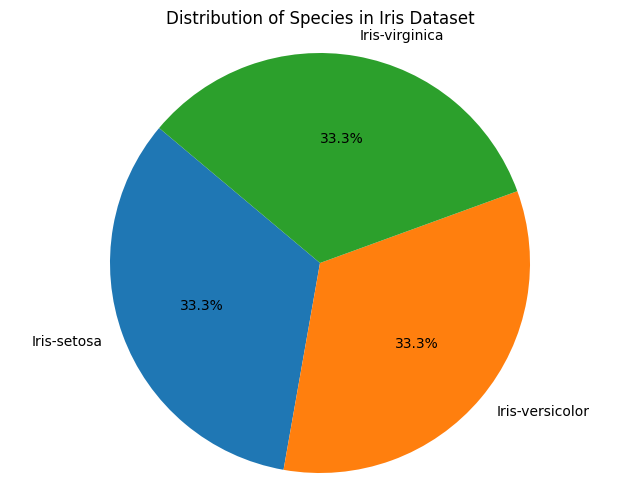

In [44]:
species_counts = iris_data['species'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Species in Iris Dataset')
plt.axis('equal')  
plt.show()